# Project Description
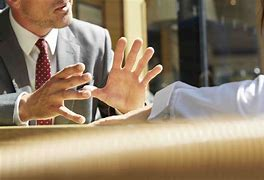

image from https://www.verywellmind.com/top-nonverbal-communication-tips-2795400


I read the article 'Top 8 Cultural Differences in Nonverbal Communication '
https://online.pointpark.edu/business/cultural-differences-in-nonverbal-communication/
which tell us that

"Nonverbal communication differences between cultures occur because of how different people around the world interpret actions in social interaction. Understanding the cultural differences in nonverbal communication is important for those with a goal to work in international business"

So in this notebook, I tried to find any difference or gap among countries, gender or age....

## The features are

* 'sex':Sex of the Client
* 'age':Age of the Client
* 'country':Country of the Client
* 'returning':If the Client is returning 
* 'GImg1':Handshakes (Indifferent, likes, dislikes)
* 'GImg2':Hug (Indifferent, likes, dislikes) 
* 'GImg3':Kiss (Indifferent, likes, dislikes)
* 'PImg1':Consent posture (Indifferent, likes, dislikes)
* 'PImg2':Interest posture (Indifferent, likes, dislikes)
* 'PImg3':Neutral posture (Indifferent, likes, dislikes)
* 'PImg4':Reflexive posture (Indifferent, likes, dislikes)
* 'PImg5':Negative posture (Indifferent, likes, dislikes)
* 'Tense - relaxed':Relaxed observed emotional clime (1 is too tensed & 10 is too relaxed)
* 'Authoritative -anarchic ':Anarchic observed emotional clime (1 is too authoritative & 10 is too anarchic)
* 'Hostile - friendly':Observed emotional clime (1 is too hostile & 10 is too friendly)
* 'TAudio1':Authoritative (Indifferent, likes, dislikes) 
* 'TAudio2':Sarcastic (Indifferent, likes, dislikes)
* 'TAudio3':Friendly (Indifferent, likes, dislikes) 
* 'QAudio1':Spitting (Indifferent, likes, dislikes) 
* 'QAudio2':Hum (Indifferent, likes, dislikes) 
* 'QAudio3':Sigh (Indifferent, likes, dislikes)
* 'Proxemics':Physical distance preferred for the client A, B, C, D, ? (A. intimate: 15cm-45cm; B. per-sonal: 46cm-122cm; C. social: 
* 'Type of Client':Class type of Client

# Importing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('non-verbal tourist data.csv')

# Data Outline

In [6]:
df.head()

,sex,age,country,returning,GImg1,GImg2,GImg3,PImg1,PImg2,PImg3,...,Authoritative -anarchic,Hostile - friendly,TAudio1,TAudio2,TAudio3,QAudio1,QAudio2,QAudio3,Proxemics,Type of Client
0,F,42,uruguay,no,likes,indiferent,indiferent,likes,likes,indiferent,...,8,3,C,dislikes,dislikes,indiferent,dislikes,dislikes,dislikes,0
1,M,60,brasil,no,likes,indiferent,indiferent,likes,likes,likes,...,9,1,B,dislikes,dislikes,likes,likes,dislikes,dislikes,0
2,F,25,england,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,10,5,C,dislikes,dislikes,likes,dislikes,dislikes,dislikes,0
3,M,43,canada,no,likes,dislikes,dislikes,likes,likes,indiferent,...,2,1,C,dislikes,dislikes,likes,dislikes,indiferent,dislikes,0
4,M,30,hungary,no,indiferent,indiferent,indiferent,likes,likes,indiferent,...,9,3,C,dislikes,dislikes,likes,indiferent,dislikes,dislikes,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sex                       73 non-null     object
 1   age                       73 non-null     int64 
 2   country                   73 non-null     object
 3   returning                 73 non-null     object
 4   GImg1                     73 non-null     object
 5   GImg2                     73 non-null     object
 6   GImg3                     73 non-null     object
 7   PImg1                     73 non-null     object
 8   PImg2                     73 non-null     object
 9   PImg3                     73 non-null     object
 10  PImg4                     73 non-null     object
 11  PImg5                     73 non-null     object
 12  Tense - relaxed           73 non-null     int64 
 13  Authoritative -anarchic   73 non-null     object
 14  Hostile - friendly        73

# Histogram by features

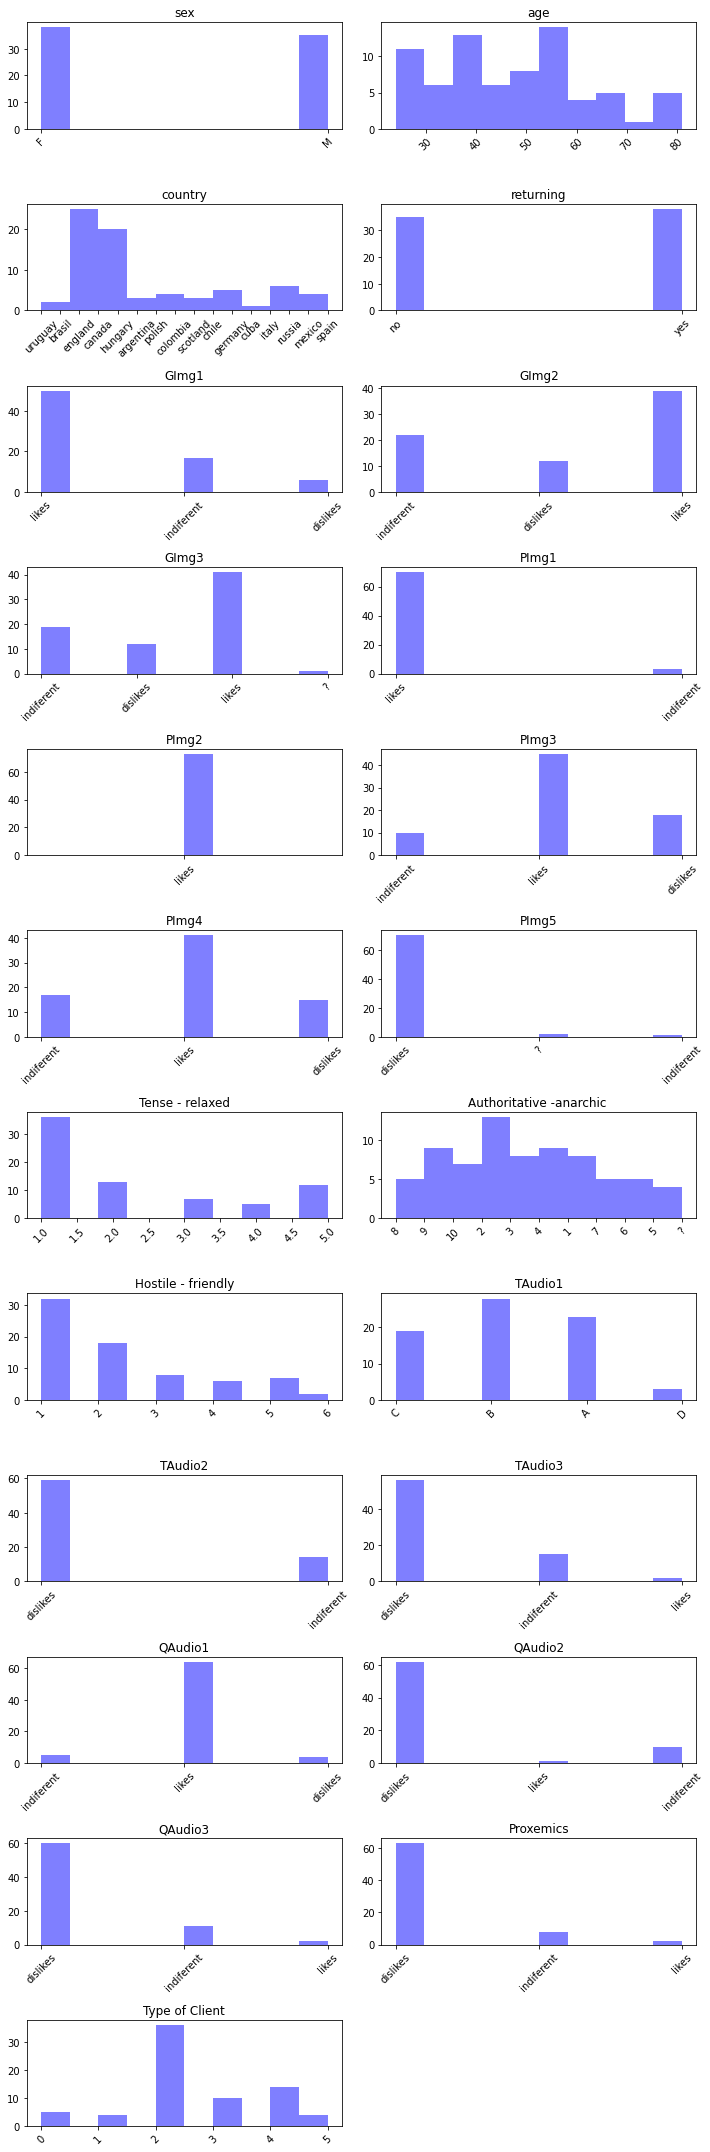

In [7]:
num_list = list(df.columns)

fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(12,2,i+1)
    plt.title(num_list[i])
    plt.xticks(rotation=45)
    plt.hist(df[num_list[i]],color='blue',alpha=0.5)

plt.tight_layout()

# Type of client by countries

<AxesSubplot:ylabel='country,Type of Client'>

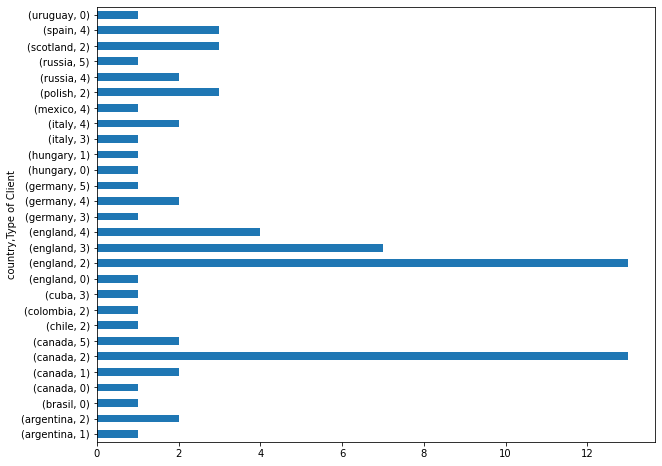

In [9]:
df.groupby(['country','Type of Client'])['country'].count().plot.barh(figsize=(10,8))

What type is major in each countries ?
* Type 0 : Brazil, Hangary, Uruguay
* Type 1 : Hungary
* Type 2 : Aegentina, Canada, Chile, Colombia,England,Scotland, Polish
* Type 3 : Cuba
* Type 4 : Germany, Spain, Russia, Mexico, Italy
* Type 5 : No major

# Feature engineering by One Hot Encoding etc..

In [10]:
df_new = df.drop(['sex','age','country','returning'],axis=1)
df_new = pd.get_dummies(df_new)
df_new['sex']=df['sex']
df_new['age']=df['age']
df_new['returning']=df['returning']
df_new['country']=df['country']
df_new.T

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
Tense - relaxed,4,2,5,3,3,1,1,1,4,1,...,5,5,3,2,3,5,5,2,5,4
Hostile - friendly,3,1,5,1,3,1,2,1,3,2,...,6,6,2,2,2,4,5,2,4,5
Type of Client,0,0,0,0,0,1,1,1,1,2,...,4,4,4,4,4,4,5,5,5,5
GImg1_dislikes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
GImg1_indiferent,0,0,1,0,1,0,1,0,0,0,...,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Proxemics_likes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
sex,F,M,F,M,M,F,M,M,F,M,...,F,F,F,F,F,F,M,F,M,M
age,42,60,25,43,30,31,64,51,28,78,...,56,48,25,25,27,36,38,46,39,27
returning,no,no,no,no,no,yes,yes,yes,no,yes,...,no,no,no,no,no,no,no,no,no,no


In [11]:
df_new = df_new.reindex(columns=['Type of Client','sex','age','returning', 'country','Tense - relaxed', 'Hostile - friendly',
       'GImg1_dislikes', 'GImg1_indiferent',
       'GImg1_likes', 'GImg2_dislikes', 'GImg2_indiferent', 'GImg2_likes',
       'GImg3_?', 'GImg3_dislikes', 'GImg3_indiferent', 'GImg3_likes',
       'PImg1_indiferent', 'PImg1_likes', 'PImg2_likes', 'PImg3_dislikes',
       'PImg3_indiferent', 'PImg3_likes', 'PImg4_dislikes', 'PImg4_indiferent',
       'PImg4_likes', 'PImg5_?', 'PImg5_dislikes', 'PImg5_indiferent',
       'Authoritative -anarchic _1', 'Authoritative -anarchic _10',
       'Authoritative -anarchic _2', 'Authoritative -anarchic _3',
       'Authoritative -anarchic _4', 'Authoritative -anarchic _5',
       'Authoritative -anarchic _6', 'Authoritative -anarchic _7',
       'Authoritative -anarchic _8', 'Authoritative -anarchic _9',
       'Authoritative -anarchic _?', 'TAudio1_A', 'TAudio1_B', 'TAudio1_C',
       'TAudio1_D', 'TAudio2_dislikes', 'TAudio2_indiferent',
       'TAudio3_dislikes', 'TAudio3_indiferent', 'TAudio3_likes',
       'QAudio1_dislikes', 'QAudio1_indiferent', 'QAudio1_likes',
       'QAudio2_dislikes', 'QAudio2_indiferent', 'QAudio2_likes',
       'QAudio3_dislikes', 'QAudio3_indiferent', 'QAudio3_likes',
       'Proxemics_dislikes', 'Proxemics_indiferent', 'Proxemics_likes'])

In [12]:
df_new=df_new.replace({'F': 0, 'M': 1})

In [14]:
df_new.head()

,Type of Client,sex,age,returning,country,Tense - relaxed,Hostile - friendly,GImg1_dislikes,GImg1_indiferent,GImg1_likes,...,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio2_likes,QAudio3_dislikes,QAudio3_indiferent,QAudio3_likes,Proxemics_dislikes,Proxemics_indiferent,Proxemics_likes
0,0,0,42,no,uruguay,4,3,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,0,1,60,no,brasil,2,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0
2,0,0,25,no,england,5,5,0,1,0,...,1,1,0,0,1,0,0,1,0,0
3,0,1,43,no,canada,3,1,0,0,1,...,1,1,0,0,0,1,0,1,0,0
4,0,1,30,no,hungary,3,3,0,1,0,...,1,0,1,0,1,0,0,1,0,0


In [15]:
pd.set_option('display.max_rows', 65)

# Average of features by countries

In [16]:
df_country_ave=df_new.groupby('country').mean()
df_country_ave.head()

,Type of Client,sex,age,Tense - relaxed,Hostile - friendly,GImg1_dislikes,GImg1_indiferent,GImg1_likes,GImg2_dislikes,GImg2_indiferent,...,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio2_likes,QAudio3_dislikes,QAudio3_indiferent,QAudio3_likes,Proxemics_dislikes,Proxemics_indiferent,Proxemics_likes
country,,,,,,,,,,,,,,,,,,,,,
argentina,1.666667,0.666667,54.333333,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.333333,...,1.000000,0.666667,0.333333,0.0,0.333333,0.666667,0.0,1.000000,0.000000,0.000000
brasil,0.000000,1.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000
canada,2.111111,0.500000,50.388889,1.444444,1.722222,0.111111,0.111111,0.777778,0.055556,0.111111,...,0.944444,0.833333,0.166667,0.0,0.944444,0.055556,0.0,0.722222,0.222222,0.055556
chile,2.000000,0.000000,81.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000
colombia,2.000000,0.000000,53.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,0.000000,0.000000


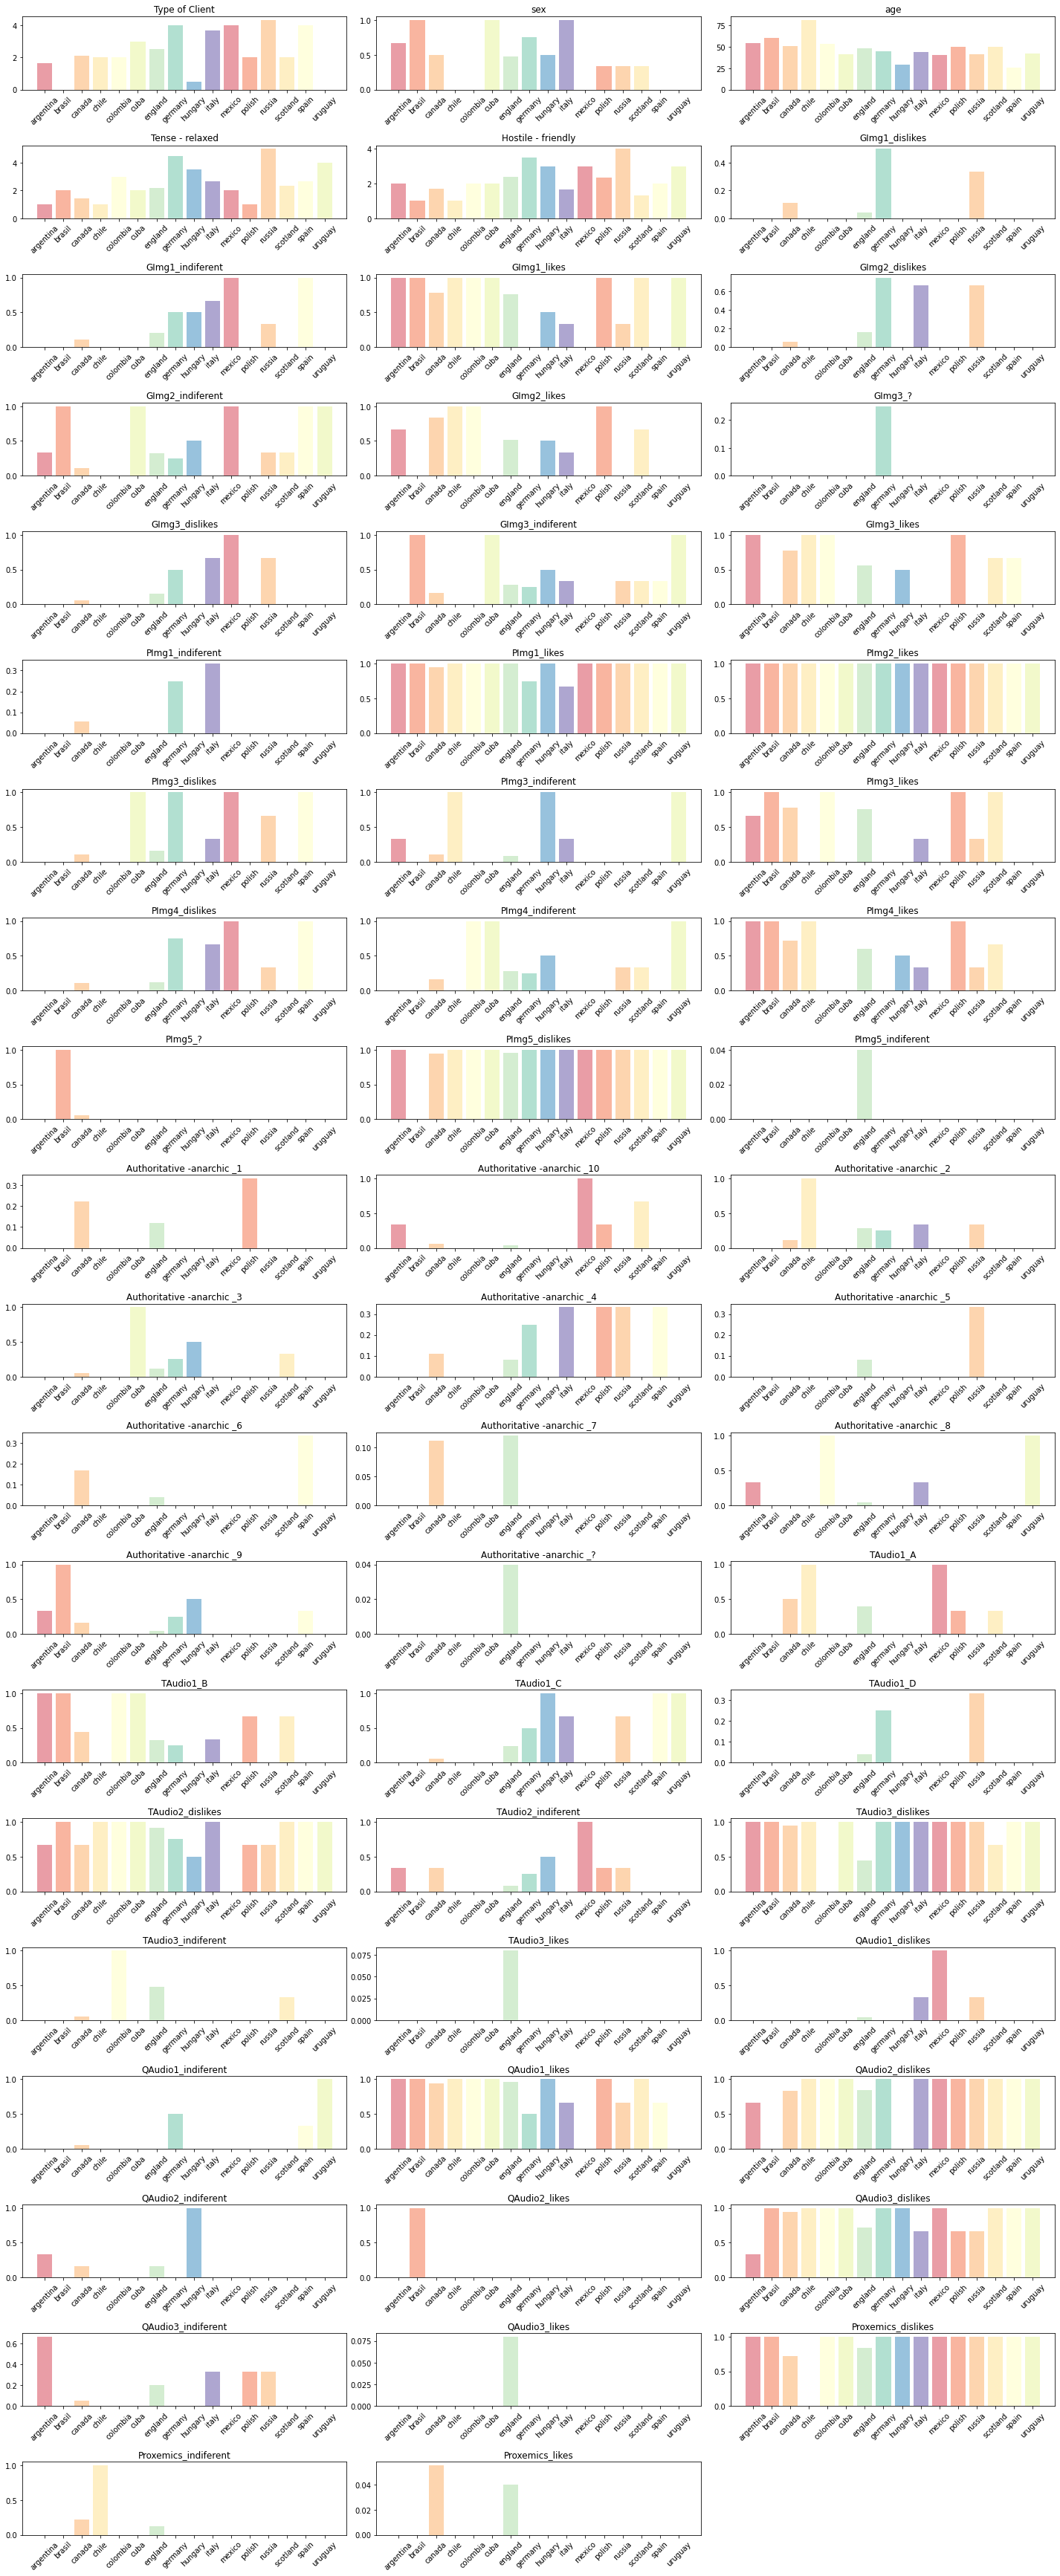

In [17]:
num_list = list(df_country_ave.columns)

fig = plt.figure(figsize=(20,50))

cm = plt.get_cmap("Spectral")
color_maps = [cm(0.1), cm(0.2), cm(0.3), cm(0.4), cm(0.5),cm(0.6),cm(0.7),cm(0.8),cm(0.9),cm(1.0)]


for i in range(len(num_list)):
    plt.subplot(21,3,i+1)
    plt.title(num_list[i])
    plt.xticks(rotation=45)
    plt.bar(x=df_country_ave.index,height=df_country_ave[num_list[i]],color=color_maps,alpha=0.5)

plt.tight_layout()

# Average of features by sex

In [18]:
df_sex_ave=df_new.groupby('sex').mean()
df_sex_ave.head()

,Type of Client,age,Tense - relaxed,Hostile - friendly,GImg1_dislikes,GImg1_indiferent,GImg1_likes,GImg2_dislikes,GImg2_indiferent,GImg2_likes,...,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio2_likes,QAudio3_dislikes,QAudio3_indiferent,QAudio3_likes,Proxemics_dislikes,Proxemics_indiferent,Proxemics_likes
sex,,,,,,,,,,,,,,,,,,,,,
0,2.526316,45.078947,2.289474,2.315789,0.026316,0.263158,0.710526,0.105263,0.315789,0.578947,...,0.868421,0.842105,0.157895,0.000000,0.868421,0.105263,0.026316,0.842105,0.131579,0.026316
1,2.457143,49.628571,2.171429,2.142857,0.142857,0.200000,0.657143,0.228571,0.285714,0.485714,...,0.885714,0.857143,0.114286,0.028571,0.771429,0.200000,0.028571,0.885714,0.085714,0.028571


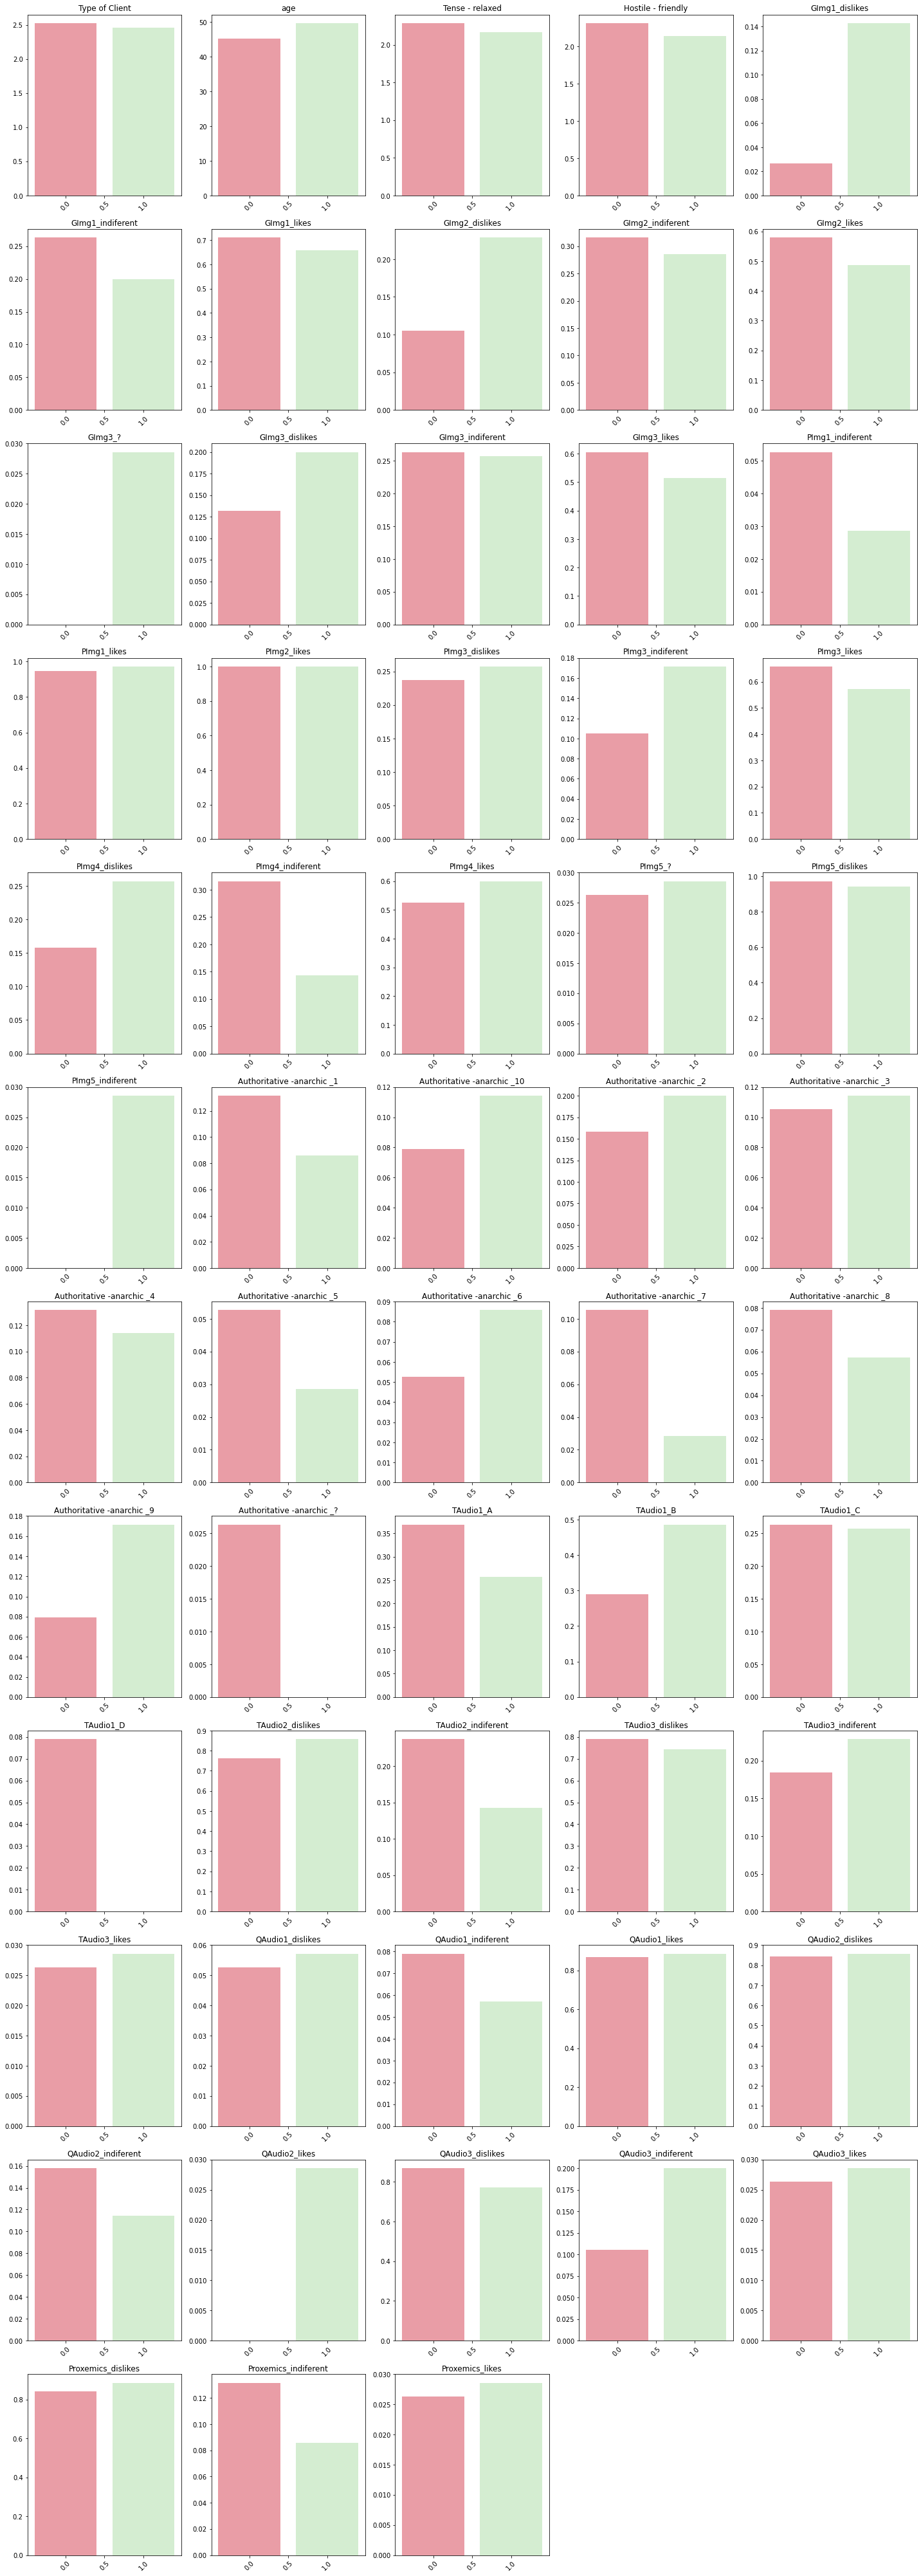

In [19]:
num_list2 = list(df_sex_ave.columns)

fig = plt.figure(figsize=(20,60))

cm = plt.get_cmap("Spectral")
color_maps = [cm(0.1),cm(0.7)]

for i in range(len(num_list2)):
    plt.subplot(13,5,i+1)
    plt.title(num_list2[i])
    plt.xticks(rotation=45)
    plt.bar(x=df_sex_ave.index,height=df_sex_ave[num_list2[i]],color=color_maps,alpha=0.5)

plt.tight_layout()

# Average of features by returning

In [20]:
df_returning_ave=df_new.groupby('returning').mean()
df_returning_ave.head()

,Type of Client,sex,age,Tense - relaxed,Hostile - friendly,GImg1_dislikes,GImg1_indiferent,GImg1_likes,GImg2_dislikes,GImg2_indiferent,...,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio2_likes,QAudio3_dislikes,QAudio3_indiferent,QAudio3_likes,Proxemics_dislikes,Proxemics_indiferent,Proxemics_likes
returning,,,,,,,,,,,,,,,,,,,,,
no,2.914286,0.457143,42.228571,3.028571,2.685714,0.171429,0.400000,0.428571,0.342857,0.400000,...,0.742857,0.885714,0.085714,0.028571,0.885714,0.114286,0.000000,0.914286,0.057143,0.028571
yes,2.105263,0.500000,51.894737,1.500000,1.815789,0.000000,0.078947,0.921053,0.000000,0.210526,...,1.000000,0.815789,0.184211,0.000000,0.763158,0.184211,0.052632,0.815789,0.157895,0.026316


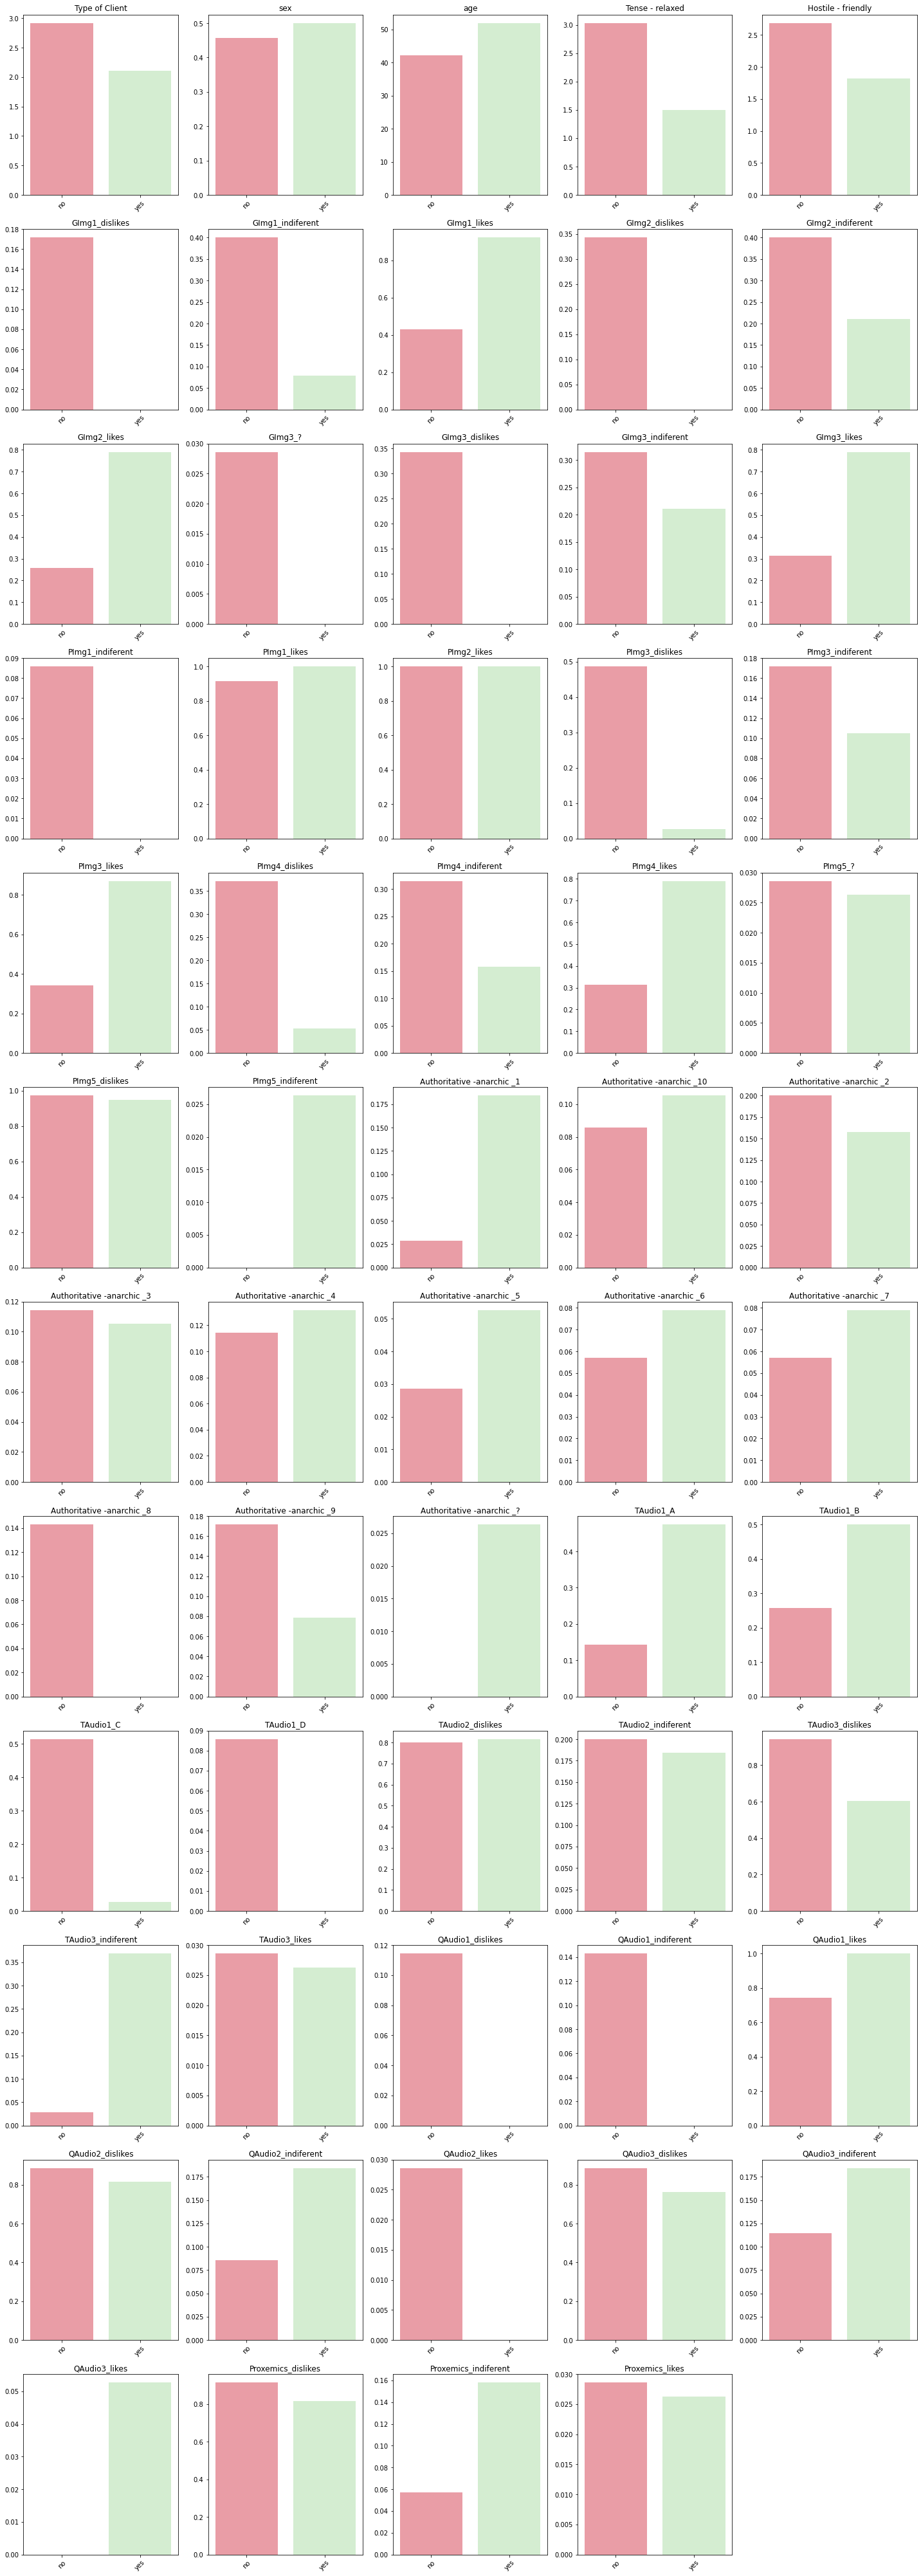

In [21]:
num_list4 = list(df_returning_ave.columns)

fig = plt.figure(figsize=(20,60))

cm = plt.get_cmap("Spectral")
color_maps = [cm(0.1),cm(0.7)]

for i in range(len(num_list4)):
    plt.subplot(13,5,i+1)
    plt.title(num_list4[i])
    plt.xticks(rotation=45)
    plt.bar(x=df_returning_ave.index,height=df_returning_ave[num_list4[i]],color=color_maps,alpha=0.5)

plt.tight_layout()

# Average of features by type of client (& majoy in countries)

In [22]:
df_client_ave=df_new.groupby('Type of Client').mean()
df_client_ave.head()

,sex,age,Tense - relaxed,Hostile - friendly,GImg1_dislikes,GImg1_indiferent,GImg1_likes,GImg2_dislikes,GImg2_indiferent,GImg2_likes,...,QAudio1_likes,QAudio2_dislikes,QAudio2_indiferent,QAudio2_likes,QAudio3_dislikes,QAudio3_indiferent,QAudio3_likes,Proxemics_dislikes,Proxemics_indiferent,Proxemics_likes
Type of Client,,,,,,,,,,,,,,,,,,,,,
0,0.600000,40.000000,3.400000,2.600000,0.000000,0.400000,0.600000,0.200000,0.800000,0.000000,...,0.800000,0.600000,0.200000,0.2,0.800000,0.200000,0.000000,1.000000,0.000000,0.000000
1,0.500000,43.500000,1.750000,1.750000,0.000000,0.250000,0.750000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,0.472222,52.861111,1.333333,1.750000,0.000000,0.027778,0.972222,0.000000,0.138889,0.861111,...,1.000000,0.916667,0.083333,0.0,0.777778,0.166667,0.055556,0.805556,0.166667,0.027778
3,0.500000,48.200000,2.200000,2.500000,0.000000,0.200000,0.800000,0.000000,0.700000,0.300000,...,1.000000,0.900000,0.100000,0.0,0.700000,0.300000,0.000000,0.900000,0.100000,0.000000
4,0.357143,38.642857,3.785714,2.785714,0.142857,0.785714,0.071429,0.642857,0.357143,0.000000,...,0.642857,1.000000,0.000000,0.0,0.928571,0.071429,0.000000,1.000000,0.000000,0.000000


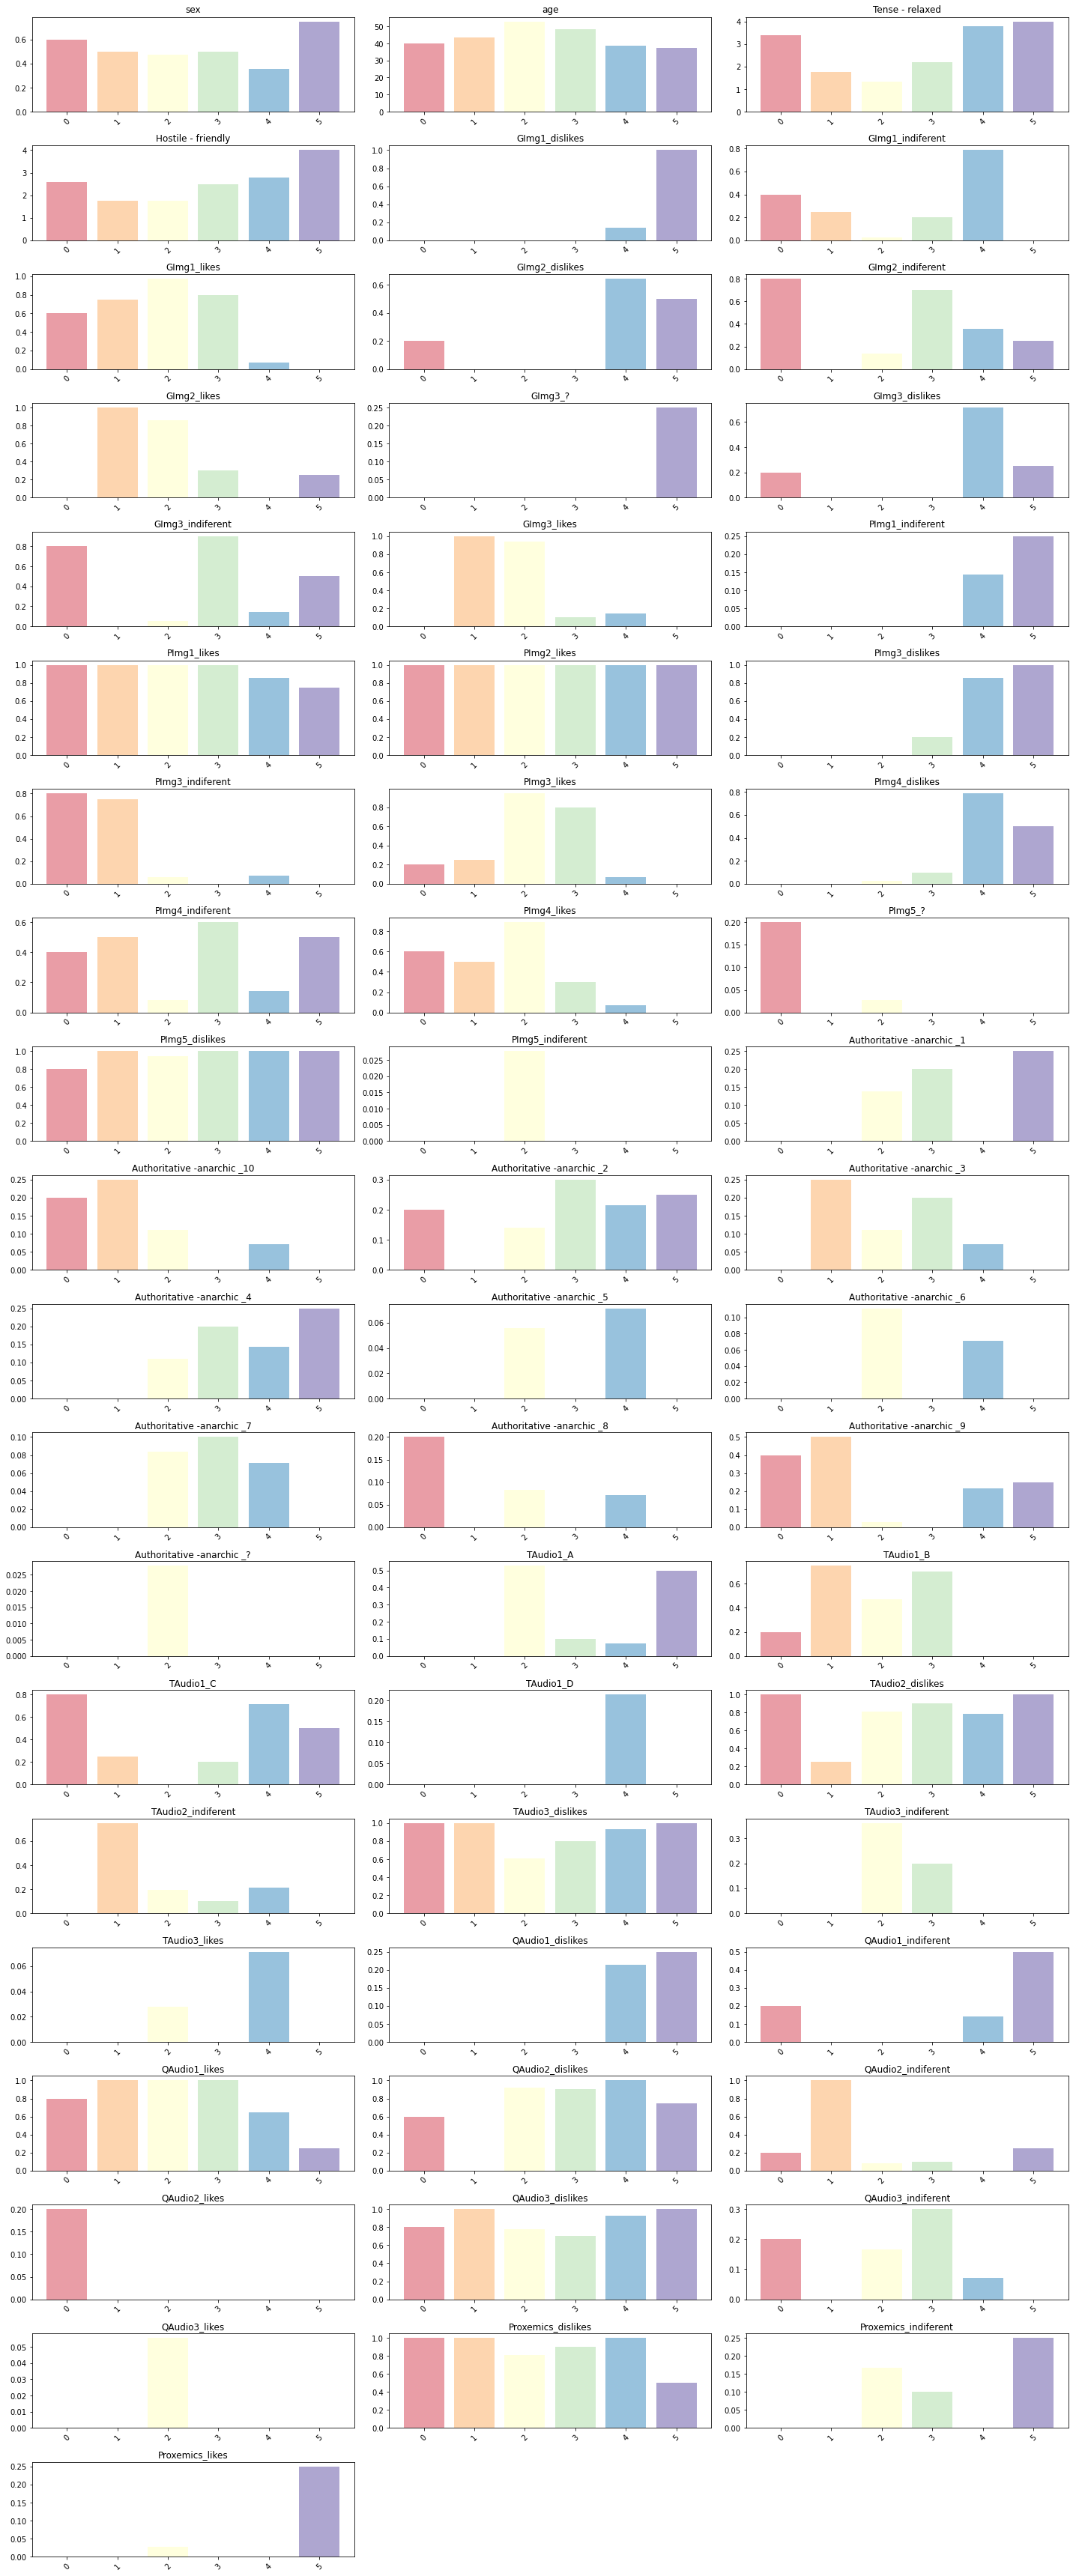

In [23]:
num_list3 = list(df_client_ave.columns)

fig = plt.figure(figsize=(20,50))

cm = plt.get_cmap("Spectral")
color_maps = [cm(0.1), cm(0.3), cm(0.5), cm(0.7), cm(0.9),cm(1.1)]

for i in range(len(num_list3)):
    plt.subplot(21,3,i+1)
    plt.title(num_list3[i])
    plt.xticks(rotation=45)
    plt.bar(x=df_client_ave.index,height=df_client_ave[num_list3[i]],color=color_maps,alpha=0.5)

plt.tight_layout()

# What type has maximam average of features ?
* Type 0 : Brazil, Hangary, Uruguay
* Type 1 : Hungary
* Type 2 : Aegentina, Canada, Chile, Colombia,England,Scotland, Polish
* Type 3 : Cuba
* Type 4 : Germany, Spain, Russia, Mexico, Italy
* Type 5 : No Major

In [24]:
df_type=pd.DataFrame(df_client_ave.idxmax())
df_type=df_type.reset_index()
df_type=df_type.sort_values(0)
df_type=df_type.rename(columns={'index': 'feature', 0: 'Type of client'})

In [25]:
def countries(ex):
    if ex==0:
        return 'Brazil, Hangary, Uruguay'
    elif ex==1:
        return 'Hungary'
    elif ex==2:
        return 'Aegentina, Canada, Chile, Colombia,England,Scotland, Polish'
    elif ex==3:
        return 'Cuba'
    elif ex==4:
        return 'Germany, Spain, Russia, Mexico, Italy'
    else:
        return 'No major'

In [26]:
df_type['countries which has miximam average']=df_type['Type of client'].apply(countries)
df_type

,feature,Type of client,countries which has miximam average
16,PImg2_likes,0,"Brazil, Hangary, Uruguay"
18,PImg3_indiferent,0,"Brazil, Hangary, Uruguay"
15,PImg1_likes,0,"Brazil, Hangary, Uruguay"
51,QAudio2_likes,0,"Brazil, Hangary, Uruguay"
8,GImg2_indiferent,0,"Brazil, Hangary, Uruguay"
41,TAudio2_dislikes,0,"Brazil, Hangary, Uruguay"
39,TAudio1_C,0,"Brazil, Hangary, Uruguay"
43,TAudio3_dislikes,0,"Brazil, Hangary, Uruguay"
55,Proxemics_dislikes,0,"Brazil, Hangary, Uruguay"
34,Authoritative -anarchic _8,0,"Brazil, Hangary, Uruguay"


# Correlation among features

In [24]:
df_new2=pd.get_dummies(df_new)

<AxesSubplot:>

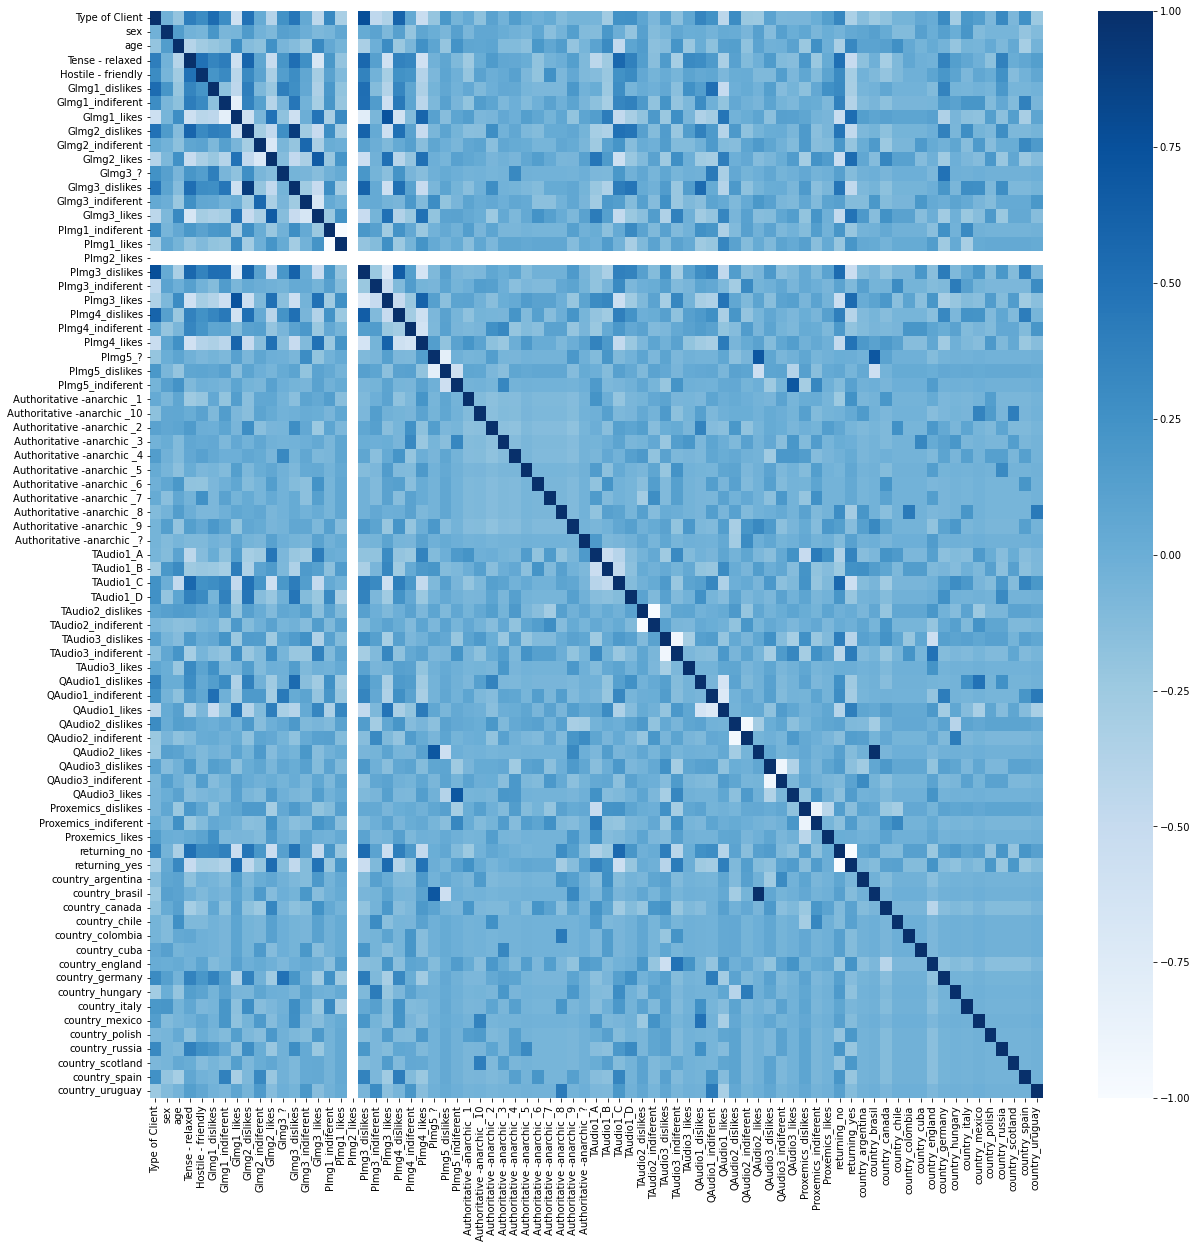

In [25]:
plt.figure(figsize = (20,20))
sns.heatmap(df_new2.corr(),cbar=True, cmap='Blues')

# Type of Client Classify Model

In [26]:
from sklearn.model_selection import train_test_split as split
import tensorflow as tf
import keras
from keras.layers import Dense,Activation

from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [27]:
X=df_new2.drop(['Type of Client'],axis=1)
y=df_new2['Type of Client']

In [28]:
x_train, x_test, y_train, y_test = split(X,y,train_size=0.8,test_size=0.2)

In [29]:
model = keras.models.Sequential()
model.add(Dense(units=32,input_dim=76))
model.add(Activation('relu'))
model.add(Dense(units=6))
model.add(Activation('softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

2022-05-17 08:17:19.871439: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [30]:
history=model.fit(x_train,y_train,epochs=100)

2022-05-17 08:17:20.326479: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 6.1360 - accuracy: 0.2931
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 4.7658 - accuracy: 0.5345
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 3.6647 - accuracy: 0.2586
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 2.0988 - accuracy: 0.3793
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 1.9253 - accuracy: 0.5345
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 1.4749 - accuracy: 0.5517
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 1.4381 - accuracy: 0.5172
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 1.3550 - accuracy: 0.5345
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 1.3649 - accuracy: 0.5172
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 1.3488 - accuracy: 0.5345
Epoch 11/100
2/2 [===========

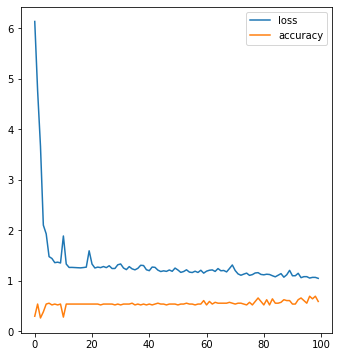

In [31]:
plt.figure(figsize=(19,6))

plt.subplot(131)
plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['accuracy'], label="accuracy")
plt.legend()

Thank you !